<center><strong><h1>TUGAS III</h1></strong></center>
<p style="margin-left:33.3333%;font-size:20px;font-weight:600;color:blue;">PENGANTAR DATA MINING</p>
<p style="margin-left:40%;font-size:20px;font-weight:600">Nama Anggota:</p>
<ul style="margin-left:28%;font-size:20px;font-weight:600">
    <li>Maftuh Mashuri (11160940000076)</li>
    <li>Zahrotul Aulia (11160940000024)</li>
    <li>Alif Tito SA (11160940000052)</li>
    <li>Khairul Umam (11160940000073)</li>
    <li>Fathi Syuhada (11150940000001)</li>
</ul>


# Import modul

In [3]:
import json
import pandas as pd
import nltk
from nltk.tokenize import TweetTokenizer as tw_tokenizer
#from unidecode import unidecode
import time

# Pengoperasian file
<p>Membuka file dan memasukkan data tweet json dan menyimpannya kedalam variabel list <i>twetts_data</i></p>

In [4]:
tweets_data = [] # Membuat list kosong untuk menyimpan data json perbaris
tweets_file = open('data/dataset.txt', "r") # membuka file
for line in tweets_file:
    try:
        tweet = json.loads(line)  # Membaca data dalam format json dari file perbaris
        tweets_data.append(tweet) # Menambahkan data dari file ke dalam list
    except:
        continue
tweets_file.close()

<h2>1. Mapping data json kedalam bentuk dataframe</h2>


In [6]:
tweets = pd.DataFrame()
# Informasi tweet
tweets['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['id_str'] = list(map(lambda tweet: tweet['id_str'], tweets_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['source'] = list(map(lambda tweet: tweet['source'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))

# Informasi user
tweets['user_id'] = list(map(lambda tweet: tweet['user']['id_str'], tweets_data))
tweets['user_name'] = list(map(lambda tweet: tweet['user']['name'], tweets_data))
tweets['user_screen_name'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['user_location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data))
tweets['user_url'] = list(map(lambda tweet: tweet['user']['url'], tweets_data))
tweets['user_description'] = list(map(lambda tweet: tweet['user']['description'], tweets_data))
tweets['user_followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], tweets_data))
tweets['user_friends_count'] = list(map(lambda tweet: tweet['user']['friends_count'], tweets_data))
tweets['user_favourites_count'] = list(map(lambda tweet: tweet['user']['favourites_count'], tweets_data))
tweets['user_statuses_count'] = list(map(lambda tweet: tweet['user']['statuses_count'], tweets_data))
tweets['user_created_at'] = list(map(lambda tweet: tweet['user']['created_at'], tweets_data))

# Informasi Tempat
tweets['address'] = list(map(lambda tweet: tweet['place']['full_name'] if tweet['place'] != None else None, tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

# Entities
hashtags = list(map(lambda tweet: tweet['entities']['hashtags'] if tweet['entities'] != None else None, tweets_data))
tweets['hashtags'] = list(map(lambda tweet : ', '.join(list(map(lambda tw : tw['text'], tweet))), hashtags))

urls = list(map(lambda tweet: tweet['entities']['urls'] if tweet['entities'] != None else None, tweets_data))
tweets['url'] = list(map(lambda tweet : ', '.join(list(map(lambda tw : tw['url'], tweet))), urls))

mentions = list(map(lambda tweet: tweet['entities']['user_mentions'] if tweet['entities'] != None else None, tweets_data))
tweets['mentions'] = list(map(lambda tweet : ', '.join(list(map(lambda tw : tw['screen_name'], tweet))), mentions))

# Informasi quoted status
tweets['quoted_status_id'] = list(map(lambda tweet : tweet['quoted_status']['id_str'] if 'quoted_status' in tweet.keys() else None, tweets_data))
tweets['quoted_status_name'] = list(map(lambda tweet : tweet['quoted_status']['user']['name'] if 'quoted_status' in tweet.keys() else None, tweets_data))
tweets['quoted_status_screen_name'] = list(map(lambda tweet : tweet['quoted_status']['user']['screen_name'] if 'quoted_status' in tweet.keys() else None, tweets_data))
tweets['quoted_status_text'] = list(map(lambda tweet : tweet['quoted_status']['text'] if 'quoted_status' in tweet.keys() else None, tweets_data))
tweets['quoted_status_quote_count'] = list(map(lambda tweet : tweet['quoted_status']['quote_count'] if 'quoted_status' in tweet.keys() else None, tweets_data))
tweets['quoted_status_reply_count'] = list(map(lambda tweet : tweet['quoted_status']['reply_count'] if 'quoted_status' in tweet.keys() else None, tweets_data))
tweets['quoted_status_retweet_count'] = list(map(lambda tweet : tweet['quoted_status']['retweet_count'] if 'quoted_status' in tweet.keys() else None, tweets_data))
tweets['quoted_status_favorite_count'] = list(map(lambda tweet : tweet['quoted_status']['favorite_count'] if 'quoted_status' in tweet.keys() else None, tweets_data))

tweetsIn = tweets[tweets.lang == 'in']
# tweetsIn.to_csv("data/" + str(time.time()) + "_export_dataframe.csv") # Eksport dataframe ke csv
# tweetsIn.to_excel("data/" + str(time.time()) + '_export_dataframe.xlsx') # Eksport dataframe ke excel

In [8]:
tweetsIn.head()

,created_at,id_str,text,source,lang,user_id,user_name,user_screen_name,user_location,user_url,...,url,mentions,quoted_status_id,quoted_status_name,quoted_status_screen_name,quoted_status_text,quoted_status_quote_count,quoted_status_reply_count,quoted_status_retweet_count,quoted_status_favorite_count
0,Tue Apr 02 17:20:35 +0000 2019,1113129109989744640,@danangtrip whahaha iya sih bener,"<a href=""http://twitter.com/download/android"" ...",in,1022884102762950657,Anita G. Sari,imnitaags,None,None,...,,danangtrip,None,None,None,None,NaN,NaN,NaN,NaN
1,Tue Apr 02 17:20:37 +0000 2019,1113129120429457409,#Repost antv_official\n• • • • • •\nLedakan Me...,"<a href=""http://instagram.com"" rel=""nofollow"">...",in,3743289672,Rida Djaenuddin,rida_djaenuddin,None,None,...,https://t.co/Bt21F2XLS2,,None,None,None,None,NaN,NaN,NaN,NaN
2,Tue Apr 02 17:20:38 +0000 2019,1113129123579224066,[00:16] #JAKARTA #MACET Kalideres arah Batu Ce...,"<a href=""http://macet.xyz"" rel=""nofollow"">twee...",in,3555146480,Dimana Macet ID,dimanamacetid,Indonesia,http://dimanamacet.com,...,,,None,None,None,None,NaN,NaN,NaN,NaN
3,Tue Apr 02 17:20:38 +0000 2019,1113129124913012737,[00:10] #JAKARTA Tol Cawang - TMII - Cibubur -...,"<a href=""http://macet.xyz"" rel=""nofollow"">twee...",in,3555146480,Dimana Macet ID,dimanamacetid,Indonesia,http://dimanamacet.com,...,,,None,None,None,None,NaN,NaN,NaN,NaN
4,Tue Apr 02 17:20:39 +0000 2019,1113129127303716866,"Well, makin kesini ku tahu yang mana yang mint...","<a href=""http://twitter.com/download/iphone"" r...",in,280780752,"me, myself, and I",irfianinra,Between saint and sinner,None,...,,,None,None,None,None,NaN,NaN,NaN,NaN


# Pengoperasian stopword
<ul>
    <li>Membuka file stopword(indonesia, inggris, noise)</li>
    <li>kemudian menggabungkan semua kata yang ada di ketiga file sehingga menjadi satu teks panjang dan menyimpannya kedalam variabel <i>stopword_file_all</i></li>
    <li>kemudian teks panjang di tokenize(dipisah perkata) dan menyimpannya ke dalam variabel list <i>stopwords</i></li>
</ul>

In [7]:
stopword_file1 = open('stopword/stopword_id.txt', "r").read() # Membuka file stopword bahasa indonesia dan menjadikan isi file tersebut sebagai string
stopword_file2 = open('stopword_en/stopwords_en.txt', "r").read()  # Membuka file stopword bahasa inggris dan menjadikan isi file tersebut sebagai string
stopword_file3 = open('stopword_noise/stopword_noise.txt', "r").read()  # Membuka file stopword noise dan menjadikan isi file tersebut sebagai string
stopword_file_all = stopword_file1 + stopword_file2 + stopword_file3  # Menggabungkan ketiga string stopword sebelumnya kedalam satu string
stopwords = stopword_file_all.split('\n') # Memisahkan kata dalam string yang sudah digambungkan berdasarkan baris
# print(stopwords)

# Pengoperasian slangwords
<ul>
    <li>Membuka file slangword(<i>colloquial-indonesian-lexicon.csv</i> dan <i>20190327_slangword.txt</i>)</li>
    <li>File yang pertama membuka dengan modul pandas dan mengkonfersinya kedalam dataframe, kemudian menyimpan masing-masing kata kedalam variabel dictionary <i>slangwords</i></li>
    <li>File yang kedua sama halnya pengoperasian pada file stopwords kemudian menyimpan masing-masing kata kedalam variabel dictionary <i>slangwords</i></li>
</ul>

In [5]:
slangwords = dict() # Membuat dictionary kosong untuk menyimpan kata slang dan formal sebagai key dan value
slangwords_dataframe = pd.read_csv('slangword/colloquial-indonesian-lexicon.csv') # Membuka file csv yang berisi kata slang dan formal dan mengkonversi kedalam dataframe
for slang, formal in zip(slangwords_dataframe['slang'], slangwords_dataframe['formal']):
    slangwords[slang] = formal # Mapping kata slang dan formal dan memasukkan ke dalam dictionary secara berulang

slangword_file = open('slangword/slangword.txt', "r").read() # Membuka file yang berisi kata slang dan kata formal dan mengkonversi kedalam string
slangwords_text = slangword_file.split('\n') # Memisahkan kata berdasarkan baris namun kata slang dan kata formal masih belum terpisah. output : (['slang:formal', ...])
#print(slangwords_text)
for slang in slangwords_text:
    split_slang = slang.split(":") # Memisahkan semua kata slang dan kata formal berdasarkan "titik dua (:)"
    slangwords[split_slang[0]] = split_slang[1] # Mapping semua kata slang dan kata formal ke dalam dictionary. Output : {'slang' : 'formal', ...}
#print(slangwords)

# 2-3. Tokenisasi dan Filtering 
<ul>
    <li>Mapping semua tweet dan menyimpannya kedalam variabel list <i>array_text</i></li>
    <li>Menggabungkan semua teks kedalam satu teks panjang <i>long_text</i></li>
    <li>Memisahkan teks perkata</li>
    <li>Menghapus simbol, ASCII, link (https: atau www.), dan kata lainnya</li>
</ul>

In [6]:
array_text = list(map(lambda tweet: unidecode(tweet).lower(), tweets['text'])) # Mapping semua text twitter dan memasukan ke dalam list. Output : ['teks panjang ...', 'teks panjang', ...]
long_text = ' '.join(array_text) # Menggabungkan semua text yang berada dalam list kedalam satu text
tokenized = tw_tokenizer().tokenize(long_text) # Memisahkan kata dalam text berasarkan "spasi"
filtered_alfanumeric = [w for w in tokenized if w.isalnum()] # Filtering kata yang hanya berisi karakater a-z dan 0-9 (Menghapus url, hashtag, mention)
print(filtered_alfanumeric[:100])

['whahaha', 'iya', 'sih', 'bener', 'ledakan', 'mercon', 'besar', 'menghancurkan', 'rumah', 'nanang', 'menewaskan', 'asih', 'pembantunya', 'se', 'kalideres', 'arah', 'batu', 'ceper', 'tangerang', 'tol', 'cawang', 'tmii', 'cibubur', 'bogor', 'ciawi', 'well', 'makin', 'kesini', 'ku', 'tahu', 'yang', 'mana', 'yang', 'minta', 'tolong', 'dan', 'yang', 'manfaatin', 'doang', 'honestly', 'setelah', 'balik', 'ke', 'indonesia', 'hal', 'yg', 'paling', 'berasa', 'beda', 'di', 'gw', 'itu', 'adalah', 'cuaca', 'astagah', 'tiap', 'jam', 'keringeta', 'kang', 'boong', 'di', 'bohongin', 'gmn', 'rasanya', 'dikecewain', 'tapi', 'tetep', 'cinta', 'sama', 'hehe', 'dasar', 'akuu', 'hee', 'aku', 'jadi', 'inget', 'minggu', 'kemaren', 'ga', 'sengaja', 'abis', 'nginjek', 'kocheng', 'ya', 'allah', 'kochengnya', 'biasa', 'a', 'yuhh', 'winterfell', 'sunyi', 'lah', 'donnaruma', 'ngapa', 'itu', 'udh', 'diganti', 'aja', 'kalo', 'ga']


# 5. Handling SlangWord
<p>Mengubah kata-kata yang sudah melalui tahap <i>Stopword removal</i> dari kata slang menjadi kata formal</p>

In [7]:
handled_slangword = list(map(lambda w : slangwords[w] if w in slangwords.keys() else w, filtered_alfanumeric))
# Mengubah kata slang menjadi kata formal (kata slang dan kata formal yang diperoleh dari dictionary) 
print(handled_slangword[:100])

['whahaha', 'iya', 'sih', 'benar', 'ledakan', 'mercon', 'besar', 'menghancurkan', 'rumah', 'nanang', 'menewaskan', 'asih', 'pembantunya', 'se', 'kalideres', 'arah', 'batu', 'pendek', 'tangerang', 'tol', 'cawang', 'tmii', 'cibubur', 'bogor', 'ciawi', 'well', 'makin', 'kesini', 'ku', 'tahu', 'yang', 'mana', 'yang', 'meminta', 'tolong', 'dan', 'yang', 'manfaatin', 'doang', 'honestly', 'setelah', 'balik', 'ke', 'indonesia', 'hal', 'yang', 'paling', 'berasa', 'beda', 'di', 'saya', 'itu', 'adalah', 'cuaca', 'astagah', 'tiap', 'jam', 'keringeta', 'kang', 'bohong', 'di', 'bohongin', 'bagaimana', 'rasanya', 'dikecewain', 'tapi', 'tetap', 'cinta', 'sama', 'hehe', 'dasar', 'aku', 'hee', 'aku', 'jadi', 'ingat', 'minggu', 'kemarin', 'tidak', 'sengaja', 'habis', 'menginjak', 'kocheng', 'ya', 'allah', 'kochengnya', 'biasa', 'a', 'yuhh', 'winterfell', 'sunyi', 'lah', 'donnaruma', 'mengapa', 'itu', 'sudah', 'diganti', 'saja', 'kalau', 'tidak']


# 4. Stopword removal
<p>Menghapus kata-kata yang sering muncul dan tidak memiliki makna (yang, di, kan)</p>

In [8]:
removed_stopwords = [w for w in handled_slangword if w not in stopwords] 
# Filtering data dengan menghapus kata yang tidak bermakna (Stopword yang diperoleh dari file)
print(removed_stopwords[:100])

['whahaha', 'ledakan', 'mercon', 'menghancurkan', 'rumah', 'nanang', 'menewaskan', 'asih', 'pembantunya', 'kalideres', 'batu', 'pendek', 'tangerang', 'tol', 'cawang', 'tmii', 'bogor', 'ciawi', 'kesini', 'ku', 'tolong', 'manfaatin', 'honestly', 'berasa', 'beda', 'cuaca', 'astagah', 'keringeta', 'kang', 'bohong', 'bohongin', 'dikecewain', 'cinta', 'dasar', 'hee', 'kemarin', 'sengaja', 'habis', 'menginjak', 'kocheng', 'allah', 'kochengnya', 'yuhh', 'winterfell', 'sunyi', 'donnaruma', 'diganti', 'balas', 'tidur', 'tidur', 'tidur', 'dibilang', 'tidur', 'mulu', 'tidur', 'dikasianin', 'bucin', 'banget', 'opo', 'opo', 'iso', 'kecuali', 'siji', 'tangi', 'esuk', 'dikasih', 'ngember', 'cerita', 'alesannya', 'simpl', 'sepotong', 'kronologinya', 'liputan', 'kal', 'seakan', 'atmosfir', 'today', 'berubah', 'oaoe', 'sweet', 'menuaa', 'menampung', 'aspirasi', 'warga', 'butuh', 'refresh', 'butuh', 'kesejukan', 'butuh', 'hiburan', 'butuh', 'ketenangan', 'malas', 'mencari', 'angkat', 'tangan', 'pin', 'mas

# 6. Lemmalization
<p>mengubah kata-kata dalam dataset tweet menjadi kata dasar dengan menggunakan modul <i>spacy</i> dan <i>sastrawi</i></p>

# a.) Sastrawi
<p>Untuk data yang sangat besar, tidak disarankan menggunakan sastrawi karena membutuhkan running time yang sangat besar. Sampai laporan ini dibuat, belum bisa lemmatize kata dari dataset dengan menggunakan sastrawi</p>
<code>stemmed_by_sastrawi = [stemmer.stem(w) for w in handled_slangword]</code>

In [9]:
start_time_sastrawi = time.time()
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Import modul stemmer dari sastrawi

# create stemmer
factory = StemmerFactory() # Membuat factori untuk stemmer dengan memanggi objek StemmerFactory()
stemmer = factory.create_stemmer() # Membuat stemmer
# stemmed_by_sastrawi = [stemmer.stem(w) for w in handled_slangword] # Mengubah kata-kata menjadi kata dasar dengan menggunakan modul sastrawi
print(stemmer.stem("Melihat"))
end_time_sastrawi = time.time()

total_time_sastrawi = end_time_sastrawi - start_time_sastrawi

print("Hasil stem menggunakan modul Sastrawi adalah", total_time_sastrawi, "detik")


lihat
Hasil stem menggunakan modul Sastrawi adalah 1.5066285133361816 detik


# b.) Spacy

In [10]:
start_time_spacy = time.time()
from spacy.lang.id import Indonesian # Import modul spacy bahasa indonesia

nlp = Indonesian() # memanggi objek Indonesian() pada modul spacy
def stem_spacy(text): # Fungsi untuk mengubah kata-kata menjadi kata dasar
    for txt in nlp(text):
        t = txt.lemma_
    return t
stemmed_by_spacy = [stem_spacy(w) for w in removed_stopwords]  # Mengubah kata-kata menjadi kata dasar dengan menggunakan modul spacy
end_time_spacy = time.time()

total_time_spacy = end_time_spacy - start_time_spacy

print("Hasil stem menggunakan modul Spacy adalah", total_time_spacy, "detik\n") # Hasil running terakhir adalah 67.62633967399597 detik
print(set(stemmed_by_spacy))


Hasil stem menggunakan modul Spacy adalah 107.27182912826538 detik

{'batards', 'perutmu', 'eilish', 'firstly', 'ulfahnimas', 'dalkot', 'interisti', 'koreya', 'perlind', '2001', 'mopi', '6th', 'sepurane', 'fucken', 'atmosfer', 'mlhn', 'bngstul', 'miroku', 'paziyamadoraibu', 'seringai', 'atm', 'naman', 'provesional', 'nudu', 'urak', 'aaaahh', 'belonnnnn', 'doyok', 'f18', 'memahan', 'seokjin', 'ot7', 'pesenlah', 'repot', 'kedada', 'jancouqe', 'bakaaaaaaaaaaaaaaaar', 'nabiy', '400k', 'impresif', 'park', 'progam', 'bkt', 'kociii', 'bara', 'plunk', 'lerr', 'oia', 'watikey', 'udara', 'ngidupin', 'wahidin', 'linafsiy', 'lukaku', '24s', 'teknis', 'koru', 'yaudahhhh', 'berat', 'hahahahhaha', 'rice', 'minimarket', 'manana', 'petukangan', 'pomerian', 'dismpakan', 'agen', 'uighurs', 'diberesin', 'esnya', 'ac', 'kalungnya', 'idowlaah', 'degc', 'bisikin', 'reti', 'magister', 'yuuukkkk', 'lollll', 'aleeee', 'hhwhwh', 'hwaaa', 'wiranto', '2004207', 'coca', 'meow', 'giniiiiii', 'gek', 'csf', 'mbakjen',

# Menghitung frekuensi semua kata yang muncul
<p>Kata yang <b>belum</b> melalui tahap 2-6 disimpan ke dalam variabel <b><i>count_words_before</i></b></p>
<p>Kata yang <b>sudah</b> melalui tahap 2-6 disimpan ke dalam variabel <b><i>count_words_after</i></b></p>

In [11]:
from collections import Counter

Counter1  = Counter(tokenized) # Menghitung frekuensi muncul semua kata
count_words_before = Counter1.items() # Menghitung kata
#print(count_words_before)

Counter2  = Counter(stemmed_by_spacy) # Menghitung frekuensi muncul semua kata
count_words_after = Counter2.items() # Menghitung kata (Tidak termasuk kata yang tidak bermakna)
#print(count_words_after)

# Fungsi untuk membuat wordcloud
<p>Fungsi tersebut untuk membuat wordcloud dan file yang berisi kata beserta frekuensinya</p>
<p>Dengan parameter: </p>
<ul>
    <li><i>count_words</i>, yaitu untuk menginput dictionary <b><i>count_words_before</i></b> dan <b><i>count_words_after</i></b></li>
    <li><i>create_file</i>, yaitu boolean untuk membuat file atau tidak</li>
    <li><i>after</i>, yaitu boolean untuk menentukan dia sudah melalui proses 2-6 atau belum</li>
</ul>

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud(count_words, create_file = False, after = True):  
    text = ""
    data_tweet = {}
    for element in count_words:
        text += str(element[0]) + " " + str(element[1]) + "\n"
        data_tweet[element[0]] = element[1]
    if after:
        nama_file = "sesudah"
    else:
        nama_file = "sebelum"
    if create_file:

        file = open("data/" + str(time.time()) + "_wordcloud_" + nama_file + "_filtering.txt", "w").write(text) # membuat file wordcloud
    
    wordcloud = WordCloud(background_color = 'white', max_words=100, contour_width=2)

    wordcloud.generate_from_frequencies(frequencies=data_tweet)
    plt.figure(figsize=(20,10))
    plt.title("Wordloud hasil dari dataset " + nama_file + " melalui proses 2-6\n", fontsize=40)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


# 7. Menampilkan semua kata unik sebelum dilakukan proses poin 2-6

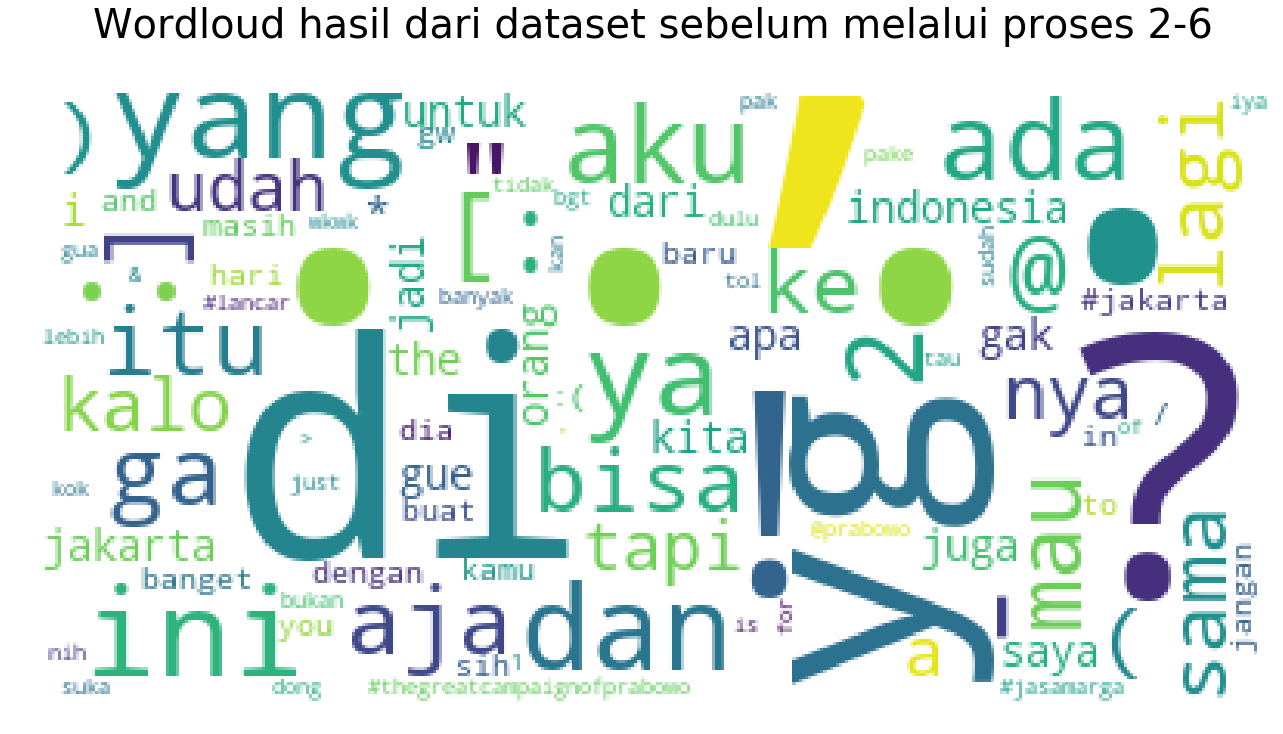

In [13]:
create_wordcloud(count_words_before, True, False)

# 8. Menampilkan semua kata unik sesudah dilakukan proses poin 2-6

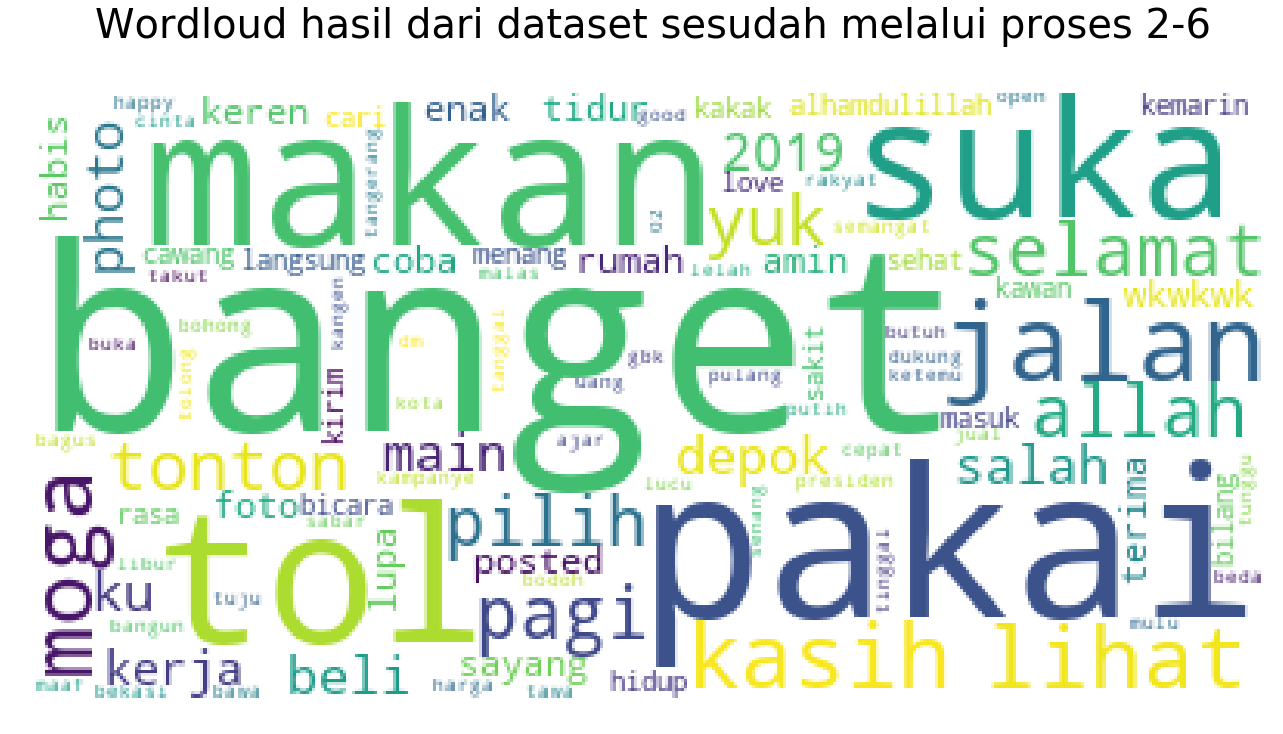

In [14]:
create_wordcloud(count_words_after, True)

In [15]:
data_user = pd.DataFrame()

data_user['username'] = tweets['user_screen_name']
data_user['nama'] = tweets['user_name']
data_user['total_like'] = tweets['user_favourites_count']
data_user['quoted_total_retweet'] = tweets['quoted_status_retweet_count']

# 9. Menampilkan Top 10 user yang paling banyak di retweet


In [16]:
data_user_sorted_by_retweet = data_user.sort_values(by=['quoted_total_retweet'], ascending=False)
data_user_droped_duplicates_retweet = data_user_sorted_by_retweet.drop_duplicates(subset='username', keep='first')
top_ten_retweet = data_user_droped_duplicates_retweet.head(10)
top_ten_retweet

,username,nama,total_like,quoted_total_retweet
24264,RanjitaTessa,supergirl :3,891,411554.0
14511,voear7,Voeller Ari7onang,8,374673.0
20025,glossy___baby,زحر,16745,362080.0
20001,grciael,GRACE,2472,361667.0
5292,BudiNugroho29,Mendoan Addict.,217,279108.0
16113,HeliHuriah,thkim_id,158,278130.0
16049,park_nurull,Pipit N Fhitriyah,365,275919.0
68924,salsa_zahra24,'call me by your name',1359,236910.0
28622,sexy4yennie,Yennie,15057,232927.0
26862,KimHyunSun3,김휸순👸💞,9424,202560.0


# Membuat grafik 10 user retweet terbanyak 

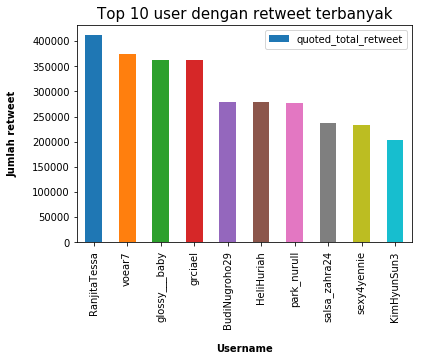

In [17]:
plot = top_ten_retweet.plot(kind='bar', x='username', y='quoted_total_retweet')
plot.set_title('Top 10 user dengan retweet terbanyak', fontsize=15)
plot.set_xlabel('Username', weight='bold', labelpad=15)
plot.set_ylabel('Jumlah retweet', weight='bold', labelpad=15)

plot.tick_params(axis='x', pad=5)

# 10. Menampilkan Top 10 user dengan likes paling banyak

In [18]:
data_user_sorted_by_like = data_user.sort_values(by=['total_like'], ascending=False)
data_user_droped_duplicates = data_user_sorted_by_like.drop_duplicates(subset='username', keep='first')
top_ten_like = data_user_droped_duplicates.head(10)
top_ten_like

,username,nama,total_like,quoted_total_retweet
55156,susi079,Francisca Susi,468890,NaN
24340,riskifebriyan94,Riski Febriyan Isaputra,214262,NaN
58606,weatherarena,weatherarena,188499,NaN
33678,trackoftear,amirah,124330,NaN
69579,nabilanabilan2,nabilanabilan,118008,NaN
53630,yuliarti22,Yuliarti22Hardjono,114416,NaN
22767,jessiej99142542,Irenlim🐯,113514,NaN
70342,ewin8923,ewin winarti,104290,NaN
34477,MuhammadDarry,Mohammad Darry,103947,NaN
52658,okta_nindya_22,fadillah oktanindya,98978,NaN


# Membuat grafik 10 user like terbanyak 

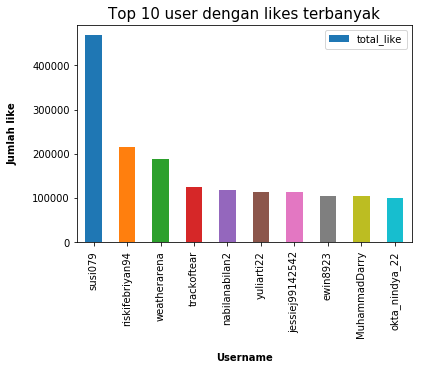

In [19]:
plot = top_ten_like.plot(kind='bar', x='username', y='total_like')
plot.set_title('Top 10 user dengan likes terbanyak', fontsize=15)
plot.set_xlabel('Username', weight='bold', labelpad=15)
plot.set_ylabel('Jumlah like', weight='bold', labelpad=15)
plot.tick_params(axis='x', pad=5)